In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import pmdarima as pm

In [4]:
# création du jeu de donnée utilisable

df = pd.read_csv("C:/Users/maelm/Documents/L2/PROJET S3/Apple/AAPL.csv") # insérer le chemin d'accès au jeu de données

#string to date format
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df = df.set_index(['Date'])
df.head(5)

df_bis = pd.read_csv("C:/Users/maelm/Documents/L2/PROJET S3/Apple/AAPL.csv")[8523:8620]
df_bis['Date'] = pd.to_datetime(df_bis['Date'],infer_datetime_format=True)
df_bis = df_bis.set_index(['Date'])

train_data =  pd.read_csv("C:/Users/maelm/Documents/L2/PROJET S3/Apple/AAPL.csv")[7837:9346]
train_data['Date'] = pd.to_datetime(train_data['Date'],infer_datetime_format=True)
train_data = train_data.set_index(['Date'])

# référence utile dans le jeu de donnée

# 25 septembre 2014 : 8560
# 2 janvier 2012 : 7837
# 2 janvier 2018 : 9346
# 2 janvier 2019 : 9597

In [10]:
# prétraitement du jeu de donnée et création du modèle de prédiction

sarima_pred = pm.auto_arima(train_data['Close'], start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, 
                         m=20, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

KeyboardInterrupt: 

C:\Users\maelm\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maelm\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


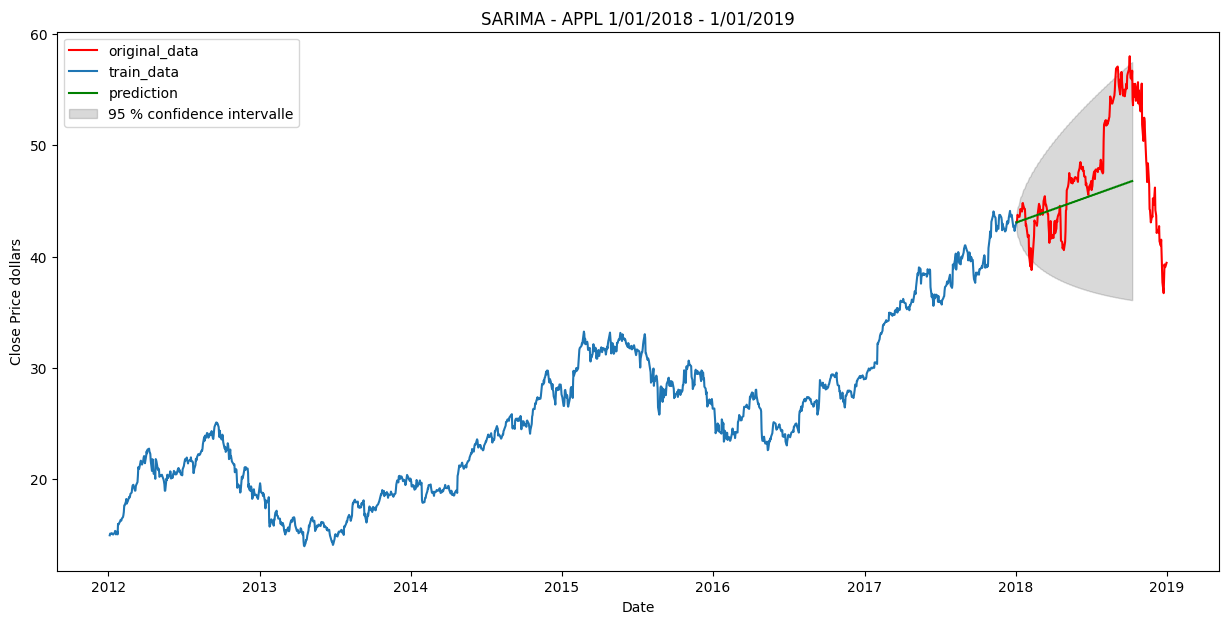

In [7]:
# prédiction et affichage

def forecast(ARIMA_model, periods=200):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(train_data['Close'].index[-1] + pd.DateOffset(day=0), periods = n_periods, freq='B')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted.array, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df['Close']["2018-01-01":"2019-01-01"], color='red', label ="original_data")
    plt.plot(train_data['Close'], color='#1f76b4', label="train_data")
    plt.plot(fitted_series, color='green', label="prediction")
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', 
                    alpha=.15 ,
                    label="95 % confidence intervalle")
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Close Price dollars")
    plt.title("SARIMA - APPL 1/01/2018 - 1/01/2019")
    plt.show()

fitted, confint = sarima_pred.predict(n_periods=80, return_conf_int=True)
fitted_series = pd.Series(fitted.array, pd.date_range(train_data['Close'].index[-1] + pd.DateOffset(day=0), periods = 80, freq='B'))
forecast(sarima_pred) 

In [23]:
# métrique d'évaluation

#MAPE
import numpy as np

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

print(mape(df['Close']["2015-02-13":"2015-06-09"], fitted_series))

0.016247396642187613


In [9]:
# métrique d'évaluation

#MAPE

from sklearn.metrics import mean_absolute_error
Y_actual = np.array(df['Close']["2015-02-13":"2015-06-09"])
Y_Predicted = np.array(fitted_series)
mape = mean_absolute_error(Y_actual, Y_Predicted)
print(mape)
    

11.88173270978022
